# Gumbel distribution

The Gumbel distribution somehow magically describes the distribution of the maximum values drawn from a set of Normal distributions. Not only that. Just replace the Normal distributions with Exponential distributions and the maxima again form a Gumbel distribution. Magic indeed!

I've been reading through http://amid.fish/humble-gumbel and I just cannot imagine that the Gumbel distribution does something there which cannot be done with a Uniform or Normal distribution. There are namely values added **independently** to a bunch of probabilities.

The case is the following. Suppose you have two categories, $c_0$ and $c_1$ with values $x_0 = 0.2$ and $x_1 = 0.8$, or $x = [0.2, 0.8]$. We would like to sample from $y \sim \arg \max_i(x_i + f(.))$. Here $f(.)$ is a stochastic function. The probability of $c_y$ should be according to $x$.

In [3]:
import numpy as np
from matplotlib.pyplot import *

In [41]:
def get_scale(distance):
    if (distance != 0):
        scale = 1+np.sqrt(4*distance**2-4*distance**3)/(2*distance)
    else:
        scale = 1
    return scale;

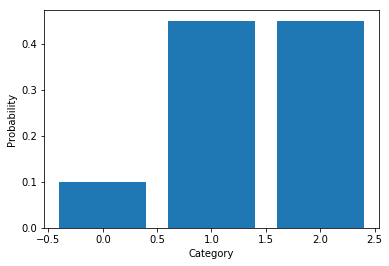

In [93]:
# Probabilities need to be ascending in size
probs = [0.1, 0.45, 0.45]
n_cats = len(probs)
cats = np.arange(n_cats)
logits = np.log(probs)

def plot_probs():
    bar(cats, probs)
    xlabel("Category")
    ylabel("Probability")
    
figure()
plot_probs()

In [94]:
all_diffs = np.subtract.outer(probs, probs)
L=len(probs)
diffs = all_diffs[np.tril_indices(L,-1)]
k=len(diffs)
scales = np.zeros(k)
for i in range(k):
    scales[i] = get_scale(diffs[i])

scale_factor = 1;
for i in range(k):
    scale_factor *= pow(scales[i], 1/k)

scale_factor = pow(scale_factor, 1/k)
print("Scale factor: ", scale_factor)

Scale factor:  1.140408517470601


Original probabilities:		0.100 0.450 0.450
Estimated probabilities:	0.116 0.442 0.443


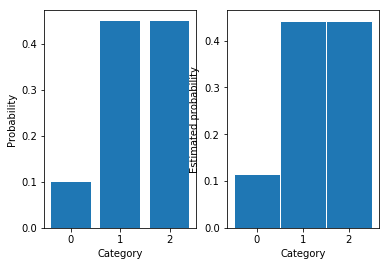

In [95]:
def plot_estimated_probs(samples):
    n_cats = np.max(samples) + 1
    estd_probs, _, _ = hist(samples,
                            bins=np.arange(n_cats + 1),
                            align='left',
                            edgecolor='white',
                            normed=True)
    xlabel("Category")
    ylabel("Estimated probability")
    return estd_probs

def sample(values, scale_factor):
    #noise = np.random.gumbel(scale=1, size=len(logits))
    #sample = np.argmax(np.log(values) + noise)
    noise = scale_factor*np.random.uniform(size=len(values))
    sample = np.argmax(values + noise)
    return sample

n_samples = 10000
samples = [sample(probs, scale_factor) for _ in range(n_samples)]

figure()
subplot(1, 2, 1)
plot_probs()
subplot(1, 2, 2)
estd_probs = plot_estimated_probs(samples)

def print_probs(probs):
    print(" ".join(["{:.3f}"] * len(probs)).format(*probs))

print("Original probabilities:\t\t", end="")
print_probs(probs)
print("Estimated probabilities:\t", end="")
print_probs(estd_probs)